Data Exploration and Preprocessing

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")




# Load data
data = pd.read_csv('diabetes.csv')
data





,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:

# Display basic information and statistics
print("Basic Information:")
print(data.info())

print("\nStatistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      

Data Visualization

<Figure size 1400x1100 with 0 Axes>

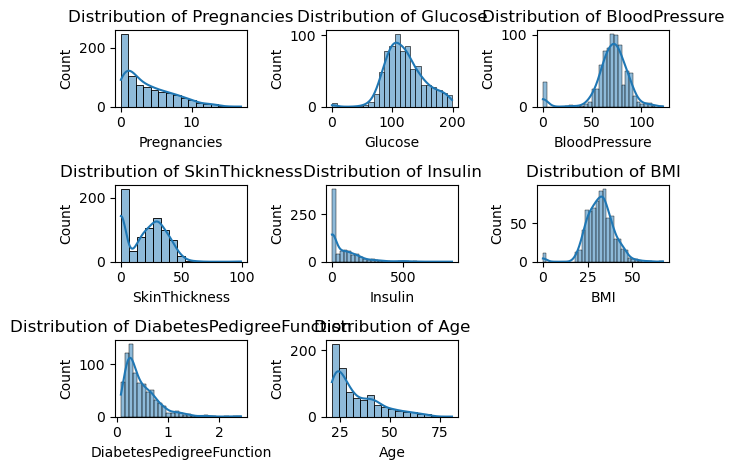

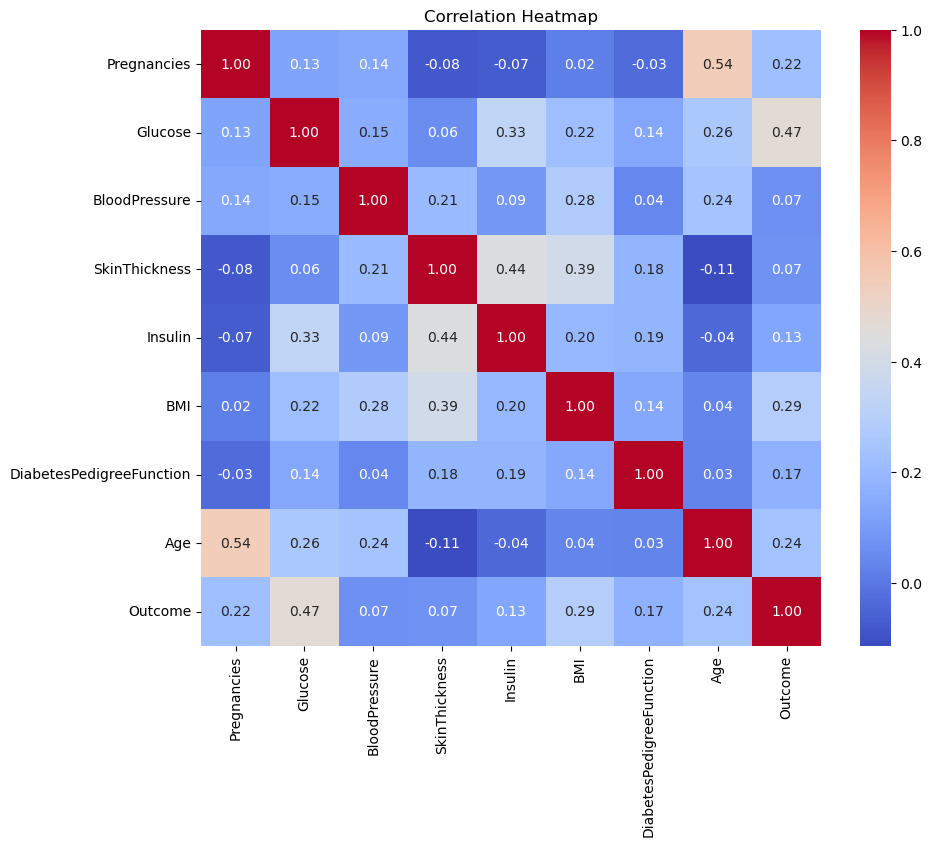

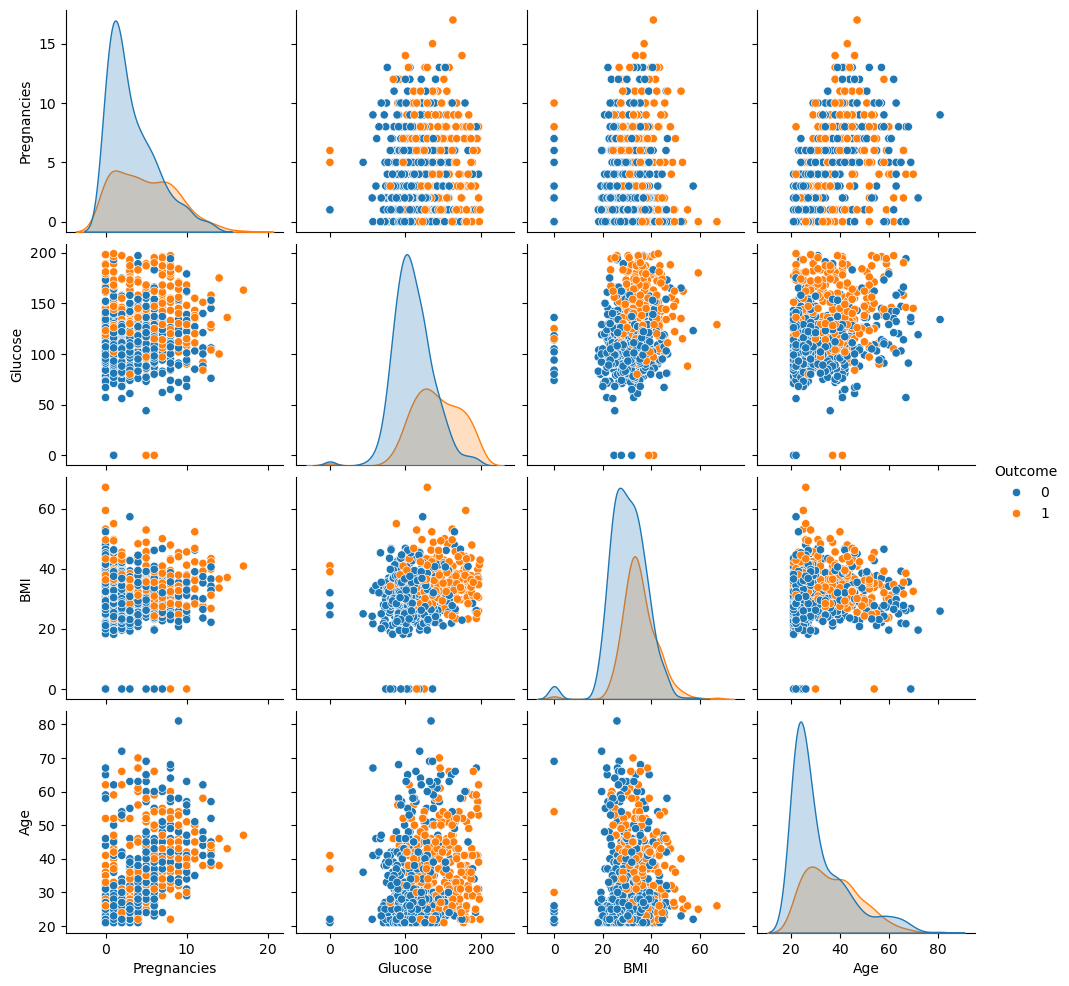

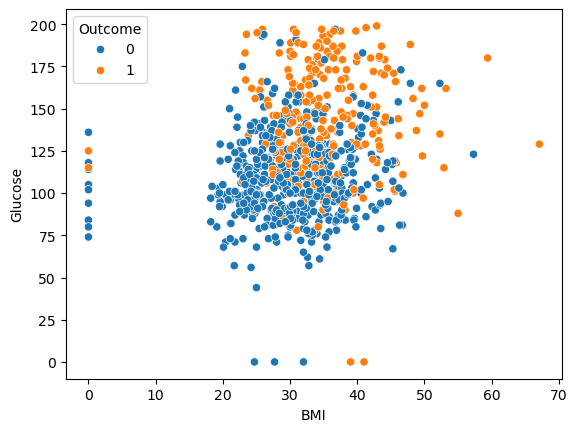

In [18]:


# Plot distributions of numerical features
plt.figure(figsize=(14,11))
plt.show()

for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid and select subplot position i+1
    sns.histplot(data[column], kde=True)  # Plot histogram with KDE
    plt.title(f'Distribution of {column}') ## Set title for the subplot

plt.tight_layout()  ## Automatically adjust subplot parameters to give some padding

plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot of some features
sns.pairplot(data[['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

sns.scatterplot(x='BMI',y='Glucose', hue='Outcome', data=data)
plt.show()

Data Preprocessing for ML

In [22]:

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X
y

# Handling missing values and scaling
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train,X_test,y_train,y_test)

[[-0.54791859 -1.15469351 -3.57259724 ... -4.06047387 -0.50700636
  -1.04154944]
 [ 1.53084665 -0.27837344  0.66661825 ... -0.48135115  2.44666971
   1.4259954 ]
 [-0.84488505  0.56664949 -1.19450074 ... -0.41789153  0.55003518
  -0.95646168]
 ...
 [ 1.82781311 -0.62264204  0.87340925 ...  1.72704372  2.00573238
   0.40494237]
 [-1.14185152  0.62924378 -3.57259724 ...  1.32090213 -0.8059981
  -0.36084741]
 [-1.14185152  0.12848945  1.39038675 ... -1.20479085 -0.63385134
  -1.04154944]] [[ 0.63994726 -0.71653347 -0.57412775 ...  0.25478047 -0.1264714
   0.83038113]
 [-0.54791859 -0.27837344  0.304734   ...  0.47054319 -0.97814487
  -1.04154944]
 [-0.54791859 -0.40356202 -0.26394125 ... -0.15136112 -0.94794368
  -1.04154944]
 ...
 [ 1.23388019 -0.81042491  0.14964075 ...  0.61015436  0.03963513
   2.02160968]
 [-0.54791859  0.7857295   0.04624525 ... -0.506735   -0.40734244
  -0.36084741]
 [ 1.23388019 -1.46766496  0.04624525 ...  0.41977549  0.70406123
   0.49003012]] 60     0
618    1


Machine Learning Model

In [26]:

# Train RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier Performance:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))




Random Forest Classifier Performance:
[[78 21]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [28]:
# Train LogisticRegression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("Logistic Regression Classifier Performance:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

Logistic Regression Classifier Performance:
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

